## Classification Modeling on Adult Income Dataset

Frame the clear problem statement. Identify the independent variables and target feature. ● Is it a binary classification or multiclass classification? Provide the category along with justification.

The goal is to predict whether an individual's income is above or below $50K based on various demographic and employment-related attributes.

The dataset contains 15 independent variables, including:
- Numerical features: age, fnlwgt, education_num, capital_gain, capital loss, hours_per_week

- Categorical featrues: workclass, education, marital_status, occupation, relationship, race, sex, native_country, income

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('adult_income.csv')

In [3]:
data.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [5]:
# 48842 rows and 15 columns
data.shape

(48842, 15)

In [6]:
# missing values
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

Observation: Missing values are found. workclass has 2799 missing values, occupation has 2809 missing values, and native_country has 857 missing values.

In [7]:
data.duplicated().sum()

52

In [8]:
# dropping duplicate
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
# 52 rows are successfully removed
data.shape

(48790, 15)

In [11]:
# handling workclass missing values
data[data['workclass'].isna()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,61,NaN,265201,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,14,United-States,<=50K
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K


In [12]:
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])


In [13]:
data.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2805
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     856
income               0
dtype: int64

In [14]:
# handling occupation missing values
data[data['occupation'].isna()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,Private,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,Private,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,Private,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,Private,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,Private,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,61,Private,265201,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,14,United-States,<=50K
48769,21,Private,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
48800,73,Private,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K
48812,81,Private,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K


In [15]:
data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [16]:
data['occupation'] = data['occupation'].fillna('Unknown')

In [17]:
data.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    856
income              0
dtype: int64

In [18]:
# handling native country missing values
data[data['native_country'].isna()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,Private,293936,7th-8th,4,Married-spouse-absent,Unknown,Not-in-family,White,Male,0,0,40,NaN,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48245,46,Private,31411,11th,7,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,NaN,<=50K
48272,24,Private,127159,Some-college,10,Never-married,Other-service,Other-relative,White,Female,0,0,24,NaN,<=50K
48604,24,State-gov,161783,Bachelors,13,Never-married,Transport-moving,Not-in-family,Black,Male,0,0,40,NaN,<=50K
48651,34,Private,143776,Masters,14,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,45,NaN,>50K


In [19]:
data['native_country'] = data['native_country'].fillna('Unknown')

In [20]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Observation: I chose 'mode imputation' method since it contains categorical values and i replaced it with the most common workclass. I chose to replace occupation and native country's missing value with 'unknown' because we should have no false assumptioms about person's origin and to avoid data bias.

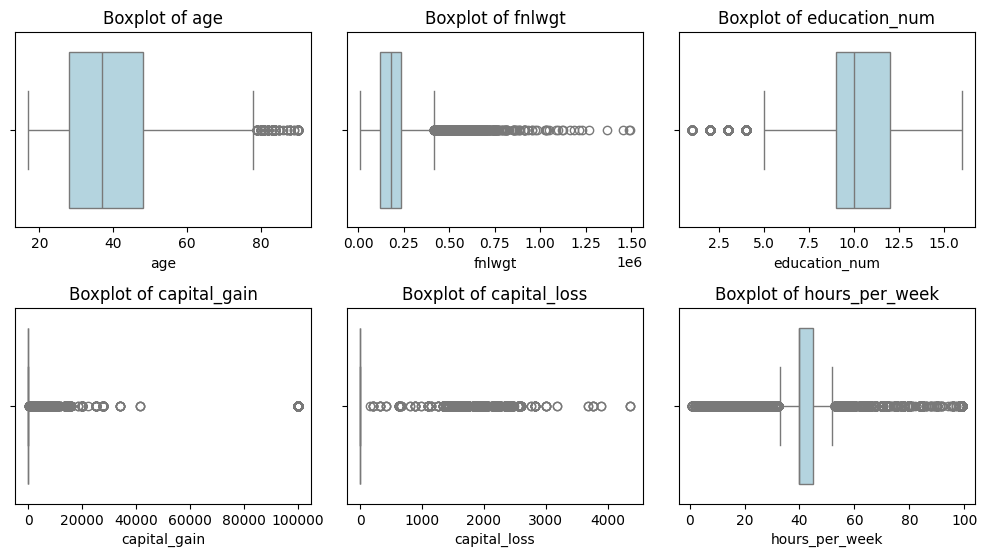

In [21]:
# finding outliers using box plots
import matplotlib.pyplot as plt
import seaborn as sns

# select only numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns

# create box plots for all numerical features
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


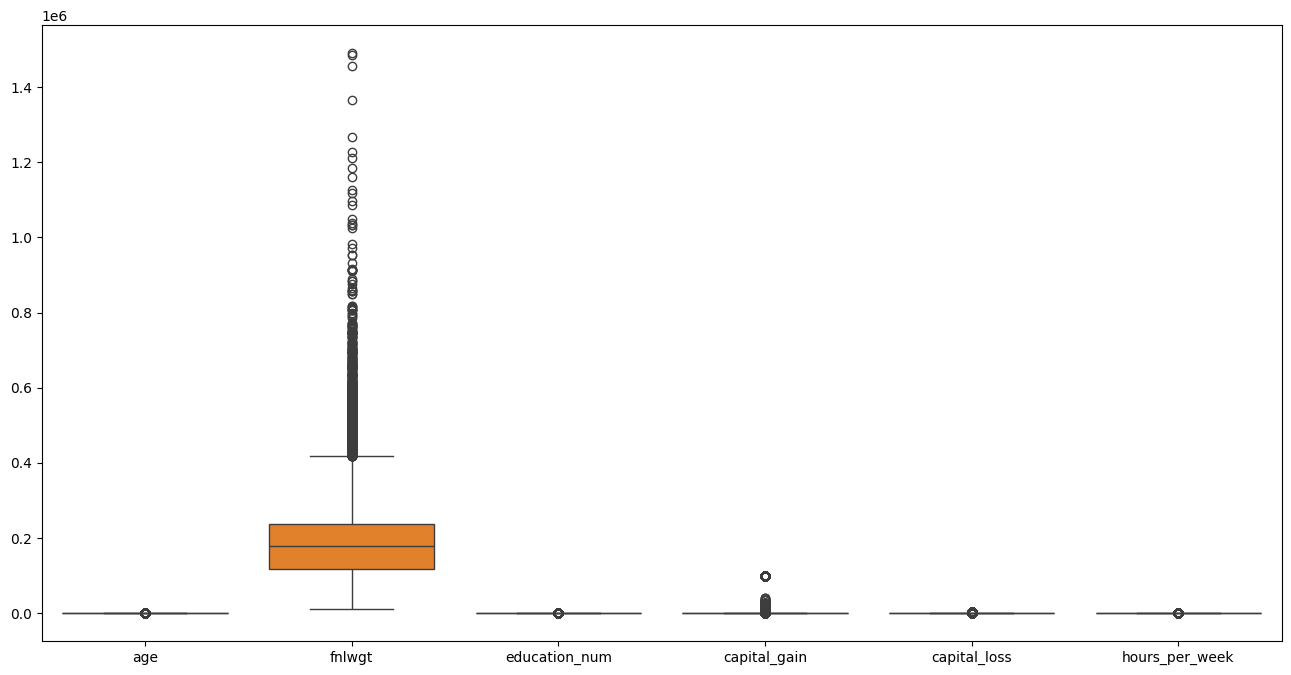

In [22]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data)
plt.show()

In [23]:
# detect outliers using IQR
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# check outliers for each numerical column
for col in numerical_cols:
    outliers = find_outliers_iqr(data, col)
    print(f"Column: {col} - Outliers Found: {len(outliers)}")


Column: age - Outliers Found: 3
Column: fnlwgt - Outliers Found: 3
Column: education_num - Outliers Found: 3
Column: capital_gain - Outliers Found: 3
Column: capital_loss - Outliers Found: 3
Column: hours_per_week - Outliers Found: 3


In [24]:
data['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, 89], dtype=int64)

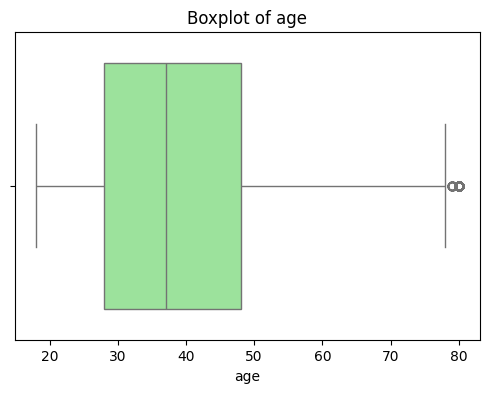

In [25]:
# handling age outliers using capping
data['age'] = data['age'].clip(lower=18, upper=80)

plt.figure(figsize=(6,4))
sns.boxplot(x = data['age'], color='lightgreen')
plt.title('Boxplot of age')
plt.show()

Observation: I chose Capping for age outliers, and the range to clip was chosen based on the IQR method (18 to 80). The extreme high values in line with the rest of the data.

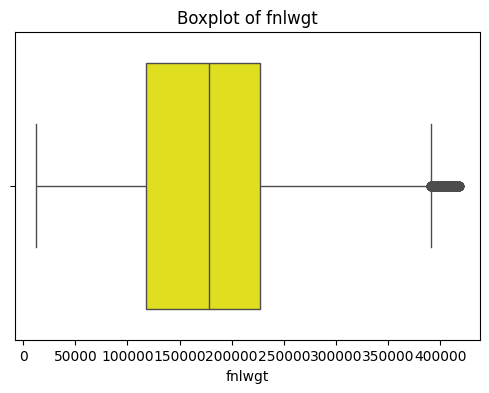

In [26]:
# handling fnlwgt using median imputation

import pandas as pd
import numpy as np

outliers, lower_bound, upper_bound = find_outliers_iqr(data, 'fnlwgt')
median_value = data['fnlwgt'].median()
data['fnlwgt'] = data['fnlwgt'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

plt.figure(figsize=(6,4))
sns.boxplot(x = data['fnlwgt'], color='yellow')
plt.title('Boxplot of fnlwgt')
plt.show()

Observation: I used the median imputation for fnlwgt since the data is extremely skewed.

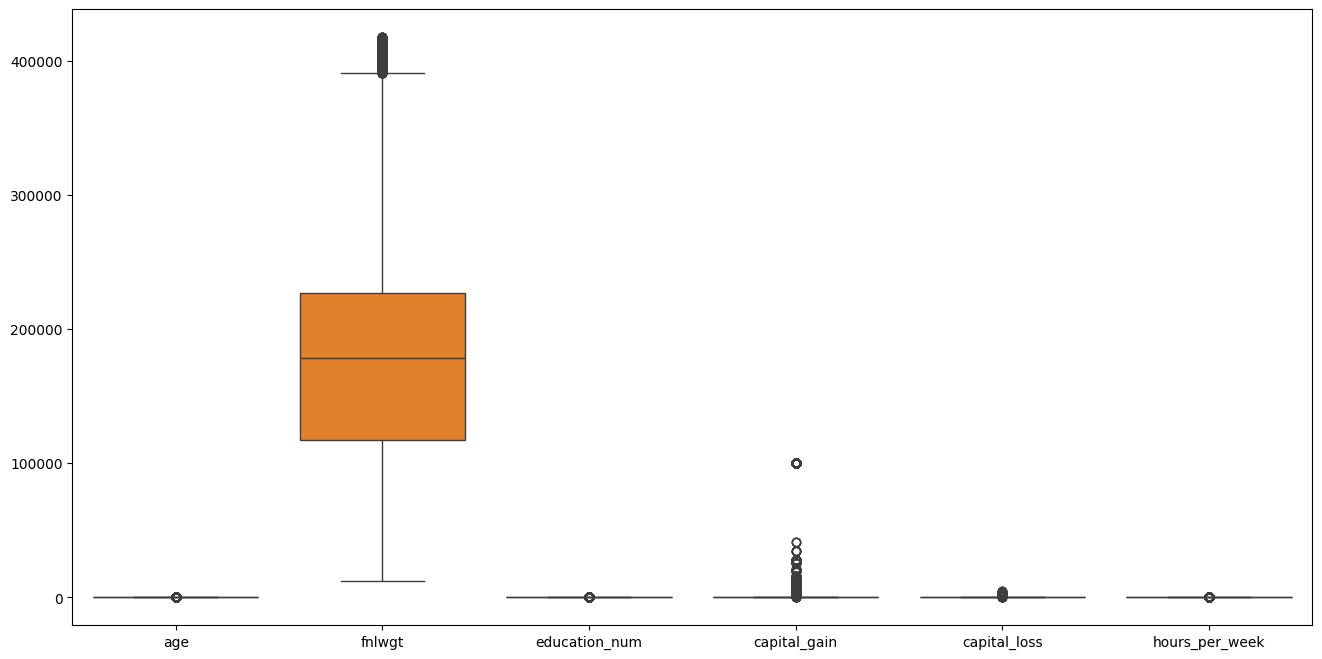

In [27]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data)
plt.show()

Observation: Since the rest of the columns can vary depending on person so I'd rather leave it as is.

In [28]:
data.dtypes

age                 int64
workclass          object
fnlwgt            float64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

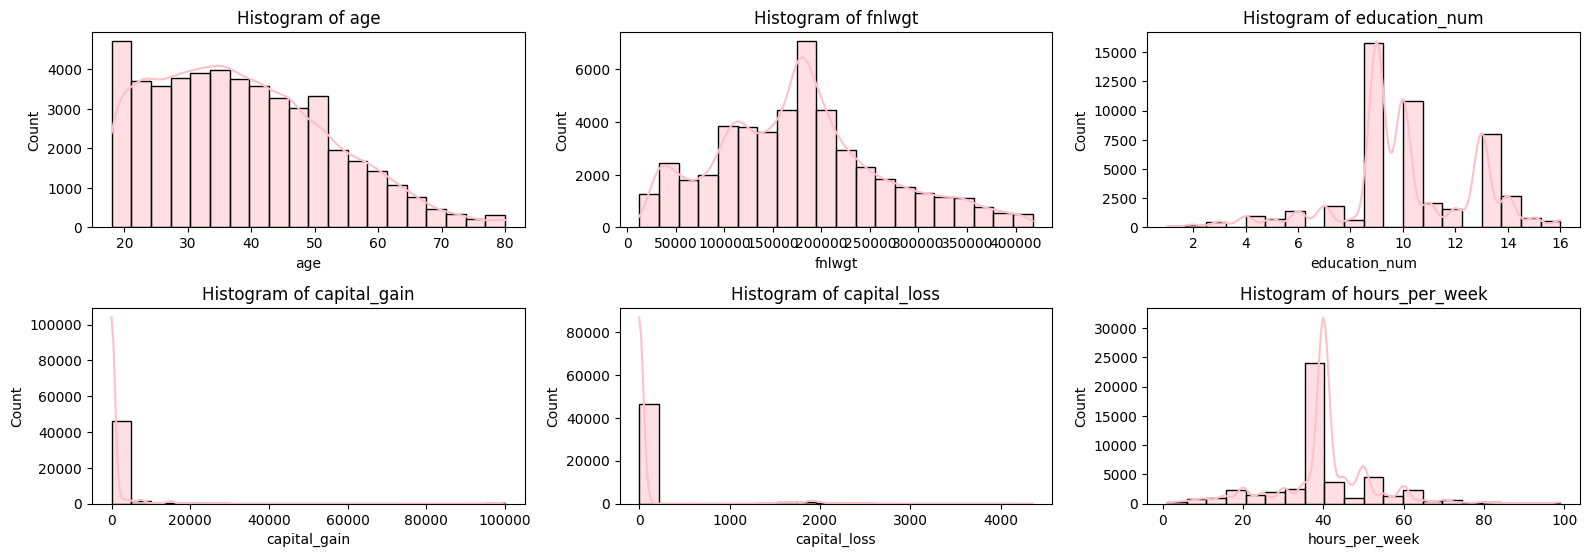

In [29]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=20, color='pink')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()

plt.show()

Observation:
- age: The tail is on the left side, suggesting that there are more people in the lower age range.
- fnlwgt: A bell-shaped distribution generally indicates a normal distribution.
- education_num: Most people in the dataset have a certain level of education.
- capital_loan and capital_loss: Most of the values are low and the rest are sparse with few extreme values.
- hours_per_week: Most individuals work around a typical number of hours.

### Encoding

In [30]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [31]:
data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [32]:
data['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [33]:
data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Unknown', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [34]:
data['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [35]:
data['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [36]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [37]:
data['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Unknown', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [38]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [39]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# ordinal encoding
education_mapping = {
    'Preschool': 0,
    '1st-4th': 1,
    '5th-6th': 2,
    '7th-8th': 3,
    '9th': 4,
    '10th': 5,
    '11th': 6,
    '12th': 7,
    'HS-grad': 8,
    'Some-college': 9,
    'Assoc-acdm': 10,
    'Assoc-voc': 11,
    'Bachelors': 12,
    'Masters': 13,
    'Prof-school': 14,
    'Doctorate': 15}

data['education'] = data['education'].map(education_mapping)

# label encoding
le = LabelEncoder()
label_encode_cols = ['workclass', 'marital_status', 'occupation', 'relationship', 'native_country', 'income']

encoding_comparison_dict = {}

for column in label_encode_cols:
    data[column] = le.fit_transform(data[column])

    # a dictionary for comparison
    comparison = dict(zip(le.classes_, le.transform(le.classes_)))
    encoding_comparison_dict[column] = comparison

for col, comparison in encoding_comparison_dict.items():
    print(f"{col} encoding comparison:")
    for category, encoded_value in comparison.items():
        print(f"  {category} -> {encoded_value}")
    print("\n")

# one-hot encoding for 'race' and 'sex'
data = pd.get_dummies(data, columns=['race', 'sex']).astype(int)

workclass encoding comparison:
  Federal-gov -> 0
  Local-gov -> 1
  Never-worked -> 2
  Private -> 3
  Self-emp-inc -> 4
  Self-emp-not-inc -> 5
  State-gov -> 6
  Without-pay -> 7


marital_status encoding comparison:
  Divorced -> 0
  Married-AF-spouse -> 1
  Married-civ-spouse -> 2
  Married-spouse-absent -> 3
  Never-married -> 4
  Separated -> 5
  Widowed -> 6


occupation encoding comparison:
  Adm-clerical -> 0
  Armed-Forces -> 1
  Craft-repair -> 2
  Exec-managerial -> 3
  Farming-fishing -> 4
  Handlers-cleaners -> 5
  Machine-op-inspct -> 6
  Other-service -> 7
  Priv-house-serv -> 8
  Prof-specialty -> 9
  Protective-serv -> 10
  Sales -> 11
  Tech-support -> 12
  Transport-moving -> 13
  Unknown -> 14


relationship encoding comparison:
  Husband -> 0
  Not-in-family -> 1
  Other-relative -> 2
  Own-child -> 3
  Unmarried -> 4
  Wife -> 5


native_country encoding comparison:
  Cambodia -> 0
  Canada -> 1
  China -> 2
  Columbia -> 3
  Cuba -> 4
  Dominican-Republic -> 5


Observation: I chose one-hot encoding for race and sex since they are non-ordinal. Education is ordinal data so i made sure the values are in correct order before encoding accordingly. The rest of the categoric values are encoded using label encoding as there are too many categories.

In [40]:
data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,6,77516,12,13,4,0,1,2174,0,40,38,0,0,0,0,0,1,0,1
1,50,5,83311,12,13,2,3,0,0,0,13,38,0,0,0,0,0,1,0,1
2,38,3,215646,8,9,0,5,1,0,0,40,38,0,0,0,0,0,1,0,1
3,53,3,234721,6,7,2,5,0,0,0,40,38,0,0,0,1,0,0,0,1
4,28,3,338409,12,13,2,9,5,0,0,40,4,0,0,0,1,0,0,1,0
5,37,3,284582,13,14,2,3,5,0,0,40,38,0,0,0,0,0,1,1,0
6,49,3,160187,4,5,3,7,1,0,0,16,22,0,0,0,1,0,0,1,0
7,52,5,209642,8,9,2,3,0,0,0,45,38,1,0,0,0,0,1,0,1
8,31,3,45781,13,14,4,9,1,14084,0,50,38,1,0,0,0,0,1,1,0
9,42,3,159449,12,13,2,3,0,5178,0,40,38,1,0,0,0,0,1,0,1


In [41]:
data.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
count,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.648371,3.099713,179635.805698,9.088215,10.078807,2.618077,6.440992,1.443472,1080.217688,87.595573,40.425886,36.455155,0.239414,0.009633,0.031092,0.095983,0.008321,0.854970,0.331543,0.668457
std,13.634454,1.111356,86314.463677,2.575226,2.570046,1.507877,4.329715,1.602571,7455.905921,403.209129,12.392729,6.037863,0.426730,0.097676,0.173569,0.294571,0.090842,0.352134,0.470773,0.470773
min,18.000000,0.000000,12285.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,117555.000000,8.000000,9.000000,2.000000,3.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,3.000000,178137.500000,9.000000,10.000000,2.000000,7.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,48.000000,3.000000,226883.000000,11.000000,12.000000,4.000000,10.000000,3.000000,0.000000,0.000000,45.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,80.000000,7.000000,417668.000000,15.000000,16.000000,6.000000,14.000000,5.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
corr = data.select_dtypes(include='number').corr()
corr

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
age,1.000000,0.045768,-0.068222,0.030527,0.029752,-0.264841,0.007086,-0.263793,0.077383,0.056769,0.070887,-0.003011,0.231012,-0.014078,-0.011126,-0.017409,-0.033398,0.032568,-0.088165,0.088165
workclass,0.045768,1.000000,-0.027661,0.008557,0.007331,-0.020841,0.002886,-0.056085,0.031554,0.004160,0.042887,-0.004711,-0.000508,-0.025842,0.008791,-0.067302,-0.005174,0.060470,-0.066675,0.066675
fnlwgt,-0.068222,-0.027661,1.000000,-0.032681,-0.030721,0.027088,-0.004775,0.006421,-0.003809,0.002563,-0.010451,-0.056340,0.000094,-0.071654,-0.044341,0.093465,0.012279,-0.039622,-0.022684,0.022684
education,0.030527,0.008557,-0.032681,1.000000,0.994340,-0.070989,0.044101,-0.091560,0.125062,0.080125,0.144863,0.090067,0.332116,-0.025379,0.063655,-0.075441,-0.044492,0.050250,-0.010109,0.010109
education_num,0.029752,0.007331,-0.030721,0.994340,1.000000,-0.069859,0.045040,-0.090697,0.125219,0.080986,0.143915,0.089868,0.332802,-0.026539,0.064256,-0.074508,-0.044158,0.049410,-0.009364,0.009364
marital_status,-0.264841,-0.020841,0.027088,-0.070989,-0.069859,1.000000,0.050170,0.187770,-0.043924,-0.033790,-0.185444,-0.017244,-0.198855,-0.000208,0.017807,0.082763,0.015122,-0.081854,0.127505,-0.127505
occupation,0.007086,0.002886,-0.004775,0.044101,0.045040,0.050170,1.000000,-0.010882,0.008141,0.006818,-0.060451,-0.000521,0.007275,-0.001128,0.010883,0.004706,0.004323,-0.010103,-0.022017,0.022017
relationship,-0.263793,-0.056085,0.006421,-0.091560,-0.090697,0.187770,-0.010882,1.000000,-0.056543,-0.057243,-0.250319,-0.007111,-0.253175,0.026655,0.011735,0.137471,0.016184,-0.132352,0.579955,-0.579955
capital_gain,0.077383,0.031554,-0.003809,0.125062,0.125219,-0.043924,0.008141,-0.056543,1.000000,-0.031475,0.082152,0.008117,0.223047,-0.007159,0.011030,-0.021492,-0.001192,0.014835,-0.047127,0.047127
capital_loss,0.056769,0.004160,0.002563,0.080125,0.080986,-0.033790,0.006818,-0.057243,-0.031475,1.000000,0.054431,0.006494,0.147542,-0.012180,0.003593,-0.021006,-0.005597,0.020624,-0.045517,0.045517


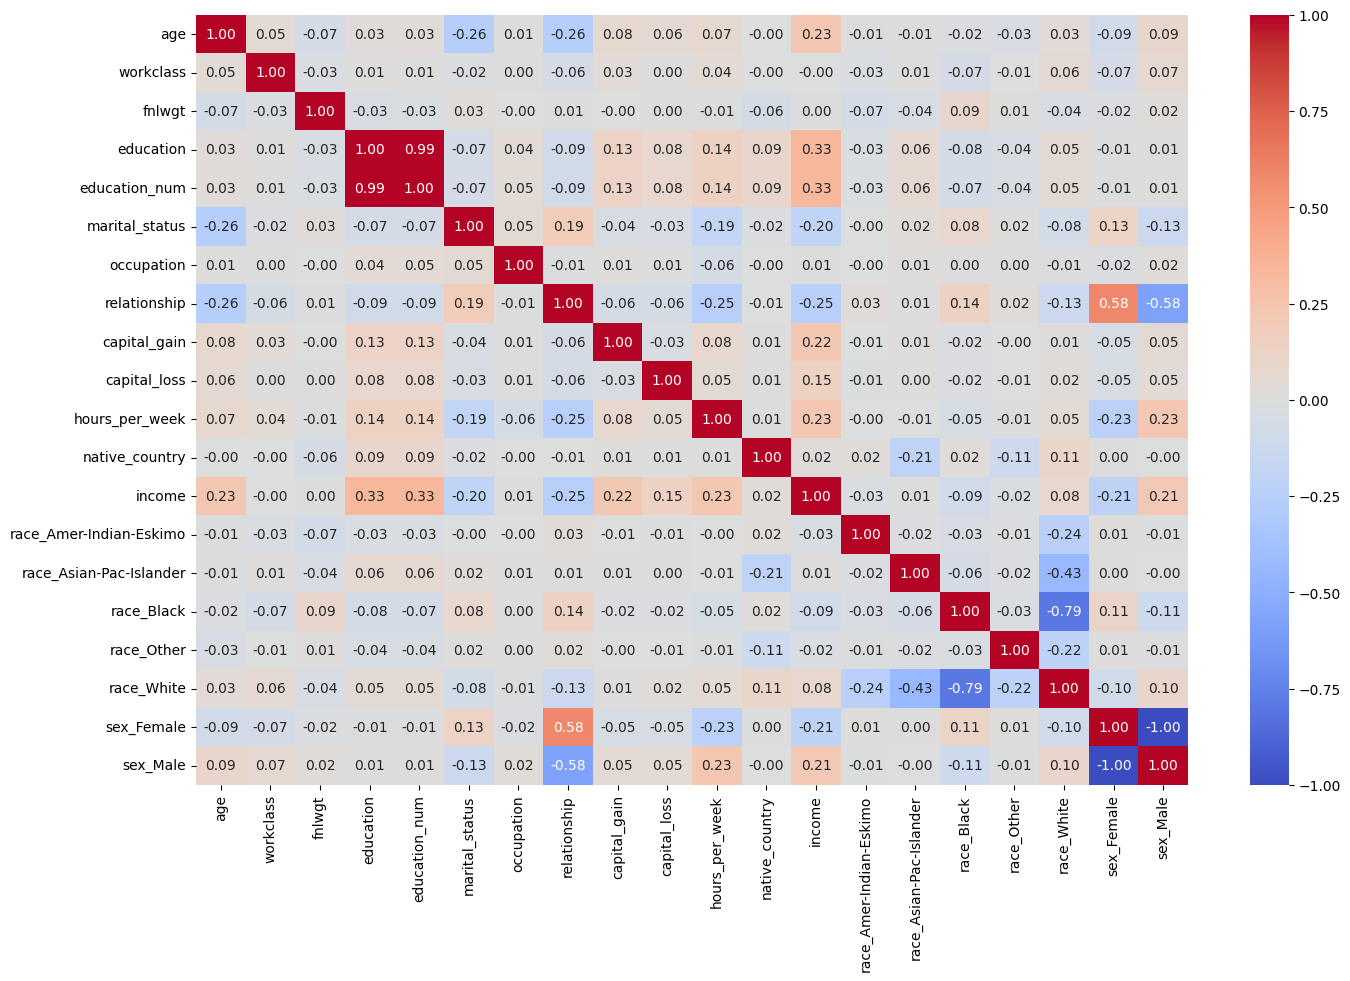

In [43]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Observation: The highest correlation coefficient of 0.99 is present between education_num and education. The next highest of 0.58 is present between sex_Female and relationship.

In [44]:
corr['income'].sort_values(ascending=False)

income                     1.000000
education_num              0.332802
education                  0.332116
age                        0.231012
hours_per_week             0.227664
capital_gain               0.223047
sex_Male                   0.214639
capital_loss               0.147542
race_White                 0.083763
native_country             0.020169
race_Asian-Pac-Islander    0.012677
occupation                 0.007275
fnlwgt                     0.000094
workclass                 -0.000508
race_Other                -0.024957
race_Amer-Indian-Eskimo   -0.028287
race_Black                -0.090524
marital_status            -0.198855
sex_Female                -0.214639
relationship              -0.253175
Name: income, dtype: float64

Observation:
- education_num, education: correlation = 0.33

  As the education level increases, the likelihood of having a higher income also increases.
- hours_per_week: correlation = 0.23

  There is a weak positive correlation between hours_per_week and income. People who work more hours are more likely to have a higher income.
- relationship: correlation = -0.25

  Individuals who are married or in relationships might have a slightly lower likelihood of earning higher incomes in this dataset.
- sex_Female: correlation = -0.21

  Females are slightly less likely to have a higher income compared to males.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'age'),
  Text(1, 0, 'workclass'),
  Text(2, 0, 'fnlwgt'),
  Text(3, 0, 'education'),
  Text(4, 0, 'education_num'),
  Text(5, 0, 'marital_status'),
  Text(6, 0, 'occupation'),
  Text(7, 0, 'relationship'),
  Text(8, 0, 'capital_gain'),
  Text(9, 0, 'capital_loss'),
  Text(10, 0, 'hours_per_week'),
  Text(11, 0, 'native_country'),
  Text(12, 0, 'income'),
  Text(13, 0, 'race_Amer-Indian-Eskimo'),
  Text(14, 0, 'race_Asian-Pac-Islander'),
  Text(15, 0, 'race_Black'),
  Text(16, 0, 'race_Other'),
  Text(17, 0, 'race_White'),
  Text(18, 0, 'sex_Female'),
  Text(19, 0, 'sex_Male')])

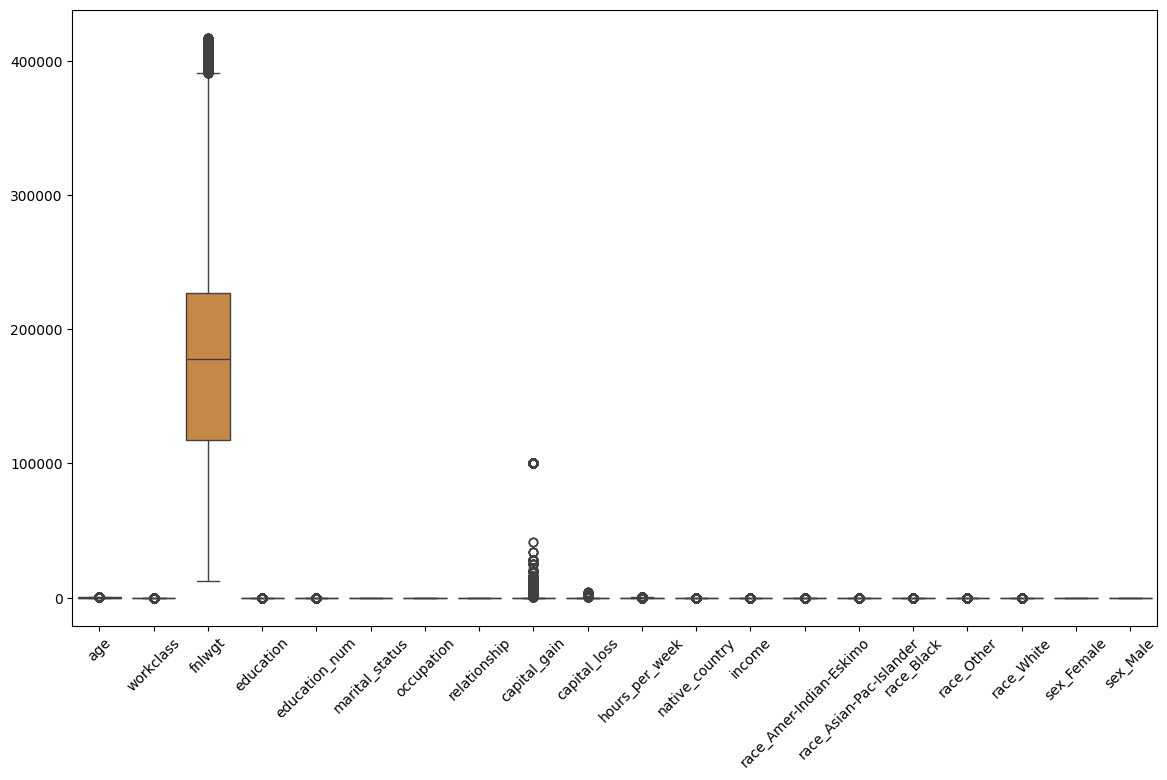

In [45]:
# visualize the box plot for each column
plt.figure(figsize=(14, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)

In [46]:
# feature scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# identify the target and independent variables
X = data.drop('income', axis=1)
Y = data['income']

#Split the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Size of training data: {X_train.shape[0]}")
print(f"Size of test data: {X_test.shape[0]}")

Size of training data: 39032
Size of test data: 9758


In [47]:
# Initialize the RobustScaler

columns_to_scale = [
    'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
    'hours_per_week'
]

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled = scaler.transform(X_test[columns_to_scale])  # Only transform on test set (no fitting)

Observation: I chose the robust scaling since there are still outliers. Columns are all continuous numerical, excluded categorical columns and target variable 'income'.

### Logistic Regression

Train Accuracy: 0.82
Test Accuracy: 0.81

Confusion Matrix (Train):


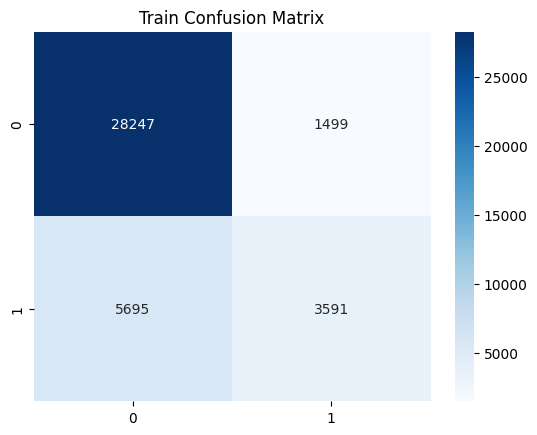


Confusion Matrix (Test):


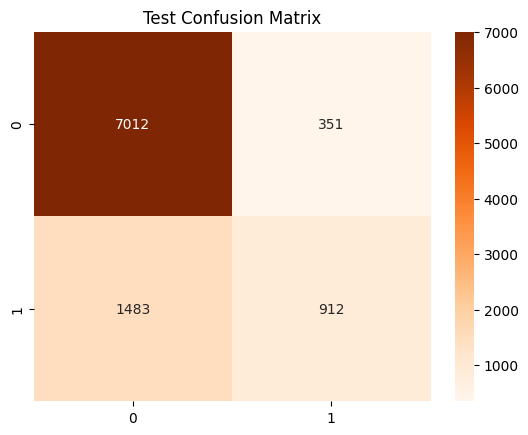


Classification Report (Train):
              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89     29746
        >50K       0.71      0.39      0.50      9286

    accuracy                           0.82     39032
   macro avg       0.77      0.67      0.69     39032
weighted avg       0.80      0.82      0.79     39032


Classification Report (Test):
              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.88      7363
        >50K       0.72      0.38      0.50      2395

    accuracy                           0.81      9758
   macro avg       0.77      0.67      0.69      9758
weighted avg       0.80      0.81      0.79      9758



LogisticRegression(max_iter=500, random_state=16)

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools

# For varied visualization
colormaps = ['Blues', 'Oranges', 'Greens', 'Purples', 'Reds', 'BuGn', 'BuPu', 'coolwarm']
color_cycle = itertools.cycle(colormaps)

def evaluate_model(model, X_train_scaled, Y_train, X_test_scaled, Y_test):

    model.fit(X_train_scaled, Y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    print(f"Train Accuracy: {accuracy_score(Y_train, y_train_pred):.2f}")
    print(f"Test Accuracy: {accuracy_score(Y_test, y_test_pred):.2f}")

    train_cmap = next(color_cycle)
    test_cmap = next(color_cycle)

    # Confusion Matrix (Train)
    print("\nConfusion Matrix (Train):")
    sns.heatmap(confusion_matrix(Y_train, y_train_pred), annot=True, fmt='g', cmap=train_cmap)
    plt.title('Train Confusion Matrix')
    plt.show()

    # Confusion Matrix (Test)
    print("\nConfusion Matrix (Test):")
    sns.heatmap(confusion_matrix(Y_test, y_test_pred), annot=True, fmt='g', cmap=test_cmap)
    plt.title('Test Confusion Matrix')
    plt.show()

    target_names = ['<=50K', '>50K']
    # Classification Report (Train)
    print("\nClassification Report (Train):")
    print(classification_report(Y_train, y_train_pred, target_names=target_names))

    # Classification Report (Test)
    print("\nClassification Report (Test):")
    print(classification_report(Y_test, y_test_pred, target_names=target_names))

    return model


lr = LogisticRegression(random_state=16, max_iter=500)
evaluate_model(lr, X_train_scaled, Y_train, X_test_scaled, Y_test)

Observation:
- True Negative(TN) = 7012

    Model correctly identifies 7012 people who earn less than 50K income.
- False Positives(FP) = 351

    Model incorrectly predicts 351 people who earn less than 50K as earning more.
- False Negatives(FN) = 1483

    Model incorrectly predicts 1483 people who earn more than 50K as earning less.
- True Postive(TP) = 912

    Model correctly identifies 912 people who earn more than 50K income.

- Accuracy = 81%

  The model correctly classifies 81% of all instances in the dataset
- Precision (Positive Predictive Value)

  <=50K : 83%
  
  >When the model predicts less than and equal to 50K income, it's correct 83% of the time.
  
  \>50K : 72%
  
  >When the model predicts more than 50K income, it's correct 72% of the time.
- Recall (Sensitivity/True Positive Rate)

  <=50K : 95%
  
  >The model correctly identifies 95% of all actual less than and equal to income cases.
  
  \>50K : 38%
  
  >The model correctly identifies 38% of all actuall more than 50K cases.
- F1-score (Balance between Precision and Recall)

  <=50K : 88%

  \>50K : 50%

  >The lower F1-score indicates that either precision, recall, or both are low for predicting individuals with income greater than 50K, meaning the model struggles with this positive class.

Key Observation:

- The overall model accuracy is 81%, meaning the model correctly classifies 81% of all instances.
- The model performs well for the "≤50K" class, with a high recall (95%) and a good F1-score (88%), indicating it reliably identifies most of those cases.
- However, for the ">50K" class, the performance drops significantly: precision is 72%, recall is only 38%, and the F1-score is just 50%. This means the model struggles to correctly identify individuals with incomes >50K, often missing many actual positive cases.
- In summary, while the model accurately classifies the majority class ("≤50K"), it is not as effective in detecting the minority class (">50K"), suggesting a potential issue with class imbalance or insufficient feature discrimination for higher income predictions.

### KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

Train Accuracy: 0.87
Test Accuracy: 0.82

Confusion Matrix (Train):


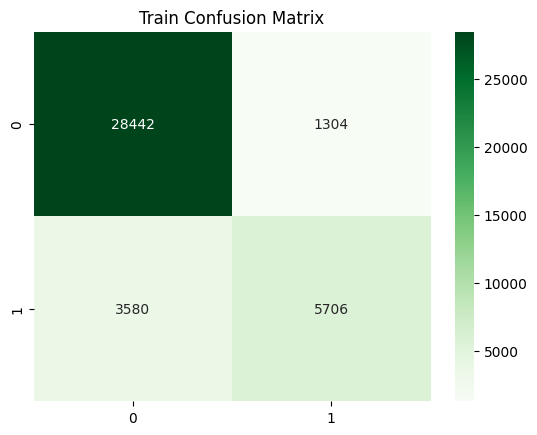


Confusion Matrix (Test):


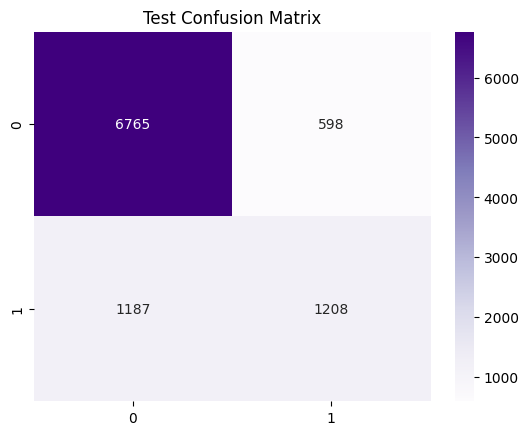


Classification Report (Train):
              precision    recall  f1-score   support

       <=50K       0.89      0.96      0.92     29746
        >50K       0.81      0.61      0.70      9286

    accuracy                           0.87     39032
   macro avg       0.85      0.79      0.81     39032
weighted avg       0.87      0.87      0.87     39032


Classification Report (Test):
              precision    recall  f1-score   support

       <=50K       0.85      0.92      0.88      7363
        >50K       0.67      0.50      0.58      2395

    accuracy                           0.82      9758
   macro avg       0.76      0.71      0.73      9758
weighted avg       0.81      0.82      0.81      9758



KNeighborsClassifier()

In [50]:
knn = KNeighborsClassifier()
evaluate_model(knn, X_train_scaled, Y_train, X_test_scaled, Y_test)

Observation:
- True Negative(TN) = 6765

    Model correctly identifies 6765 people who earn less than 50K income.
- False Positives(FP) = 598

    Model incorrectly predicts 598 people who earn less than 50K as earning more.
- False Negatives(FN) = 1187

    Model incorrectly predicts 1187 people who earn more than 50K as earning less.
- True Postive(TP) = 1208

    Model correctly identifies 1208 people who earn more than 50K income.

- Accuracy = 82%

  The model correctly classifies 82% of all instances in the dataset
- Precision (Positive Predictive Value)

  <=50K : 85%
  
  >When the model predicts less than and equal to 50K income, it's correct 85% of the time.
  
  \>50K : 67%
  
  >When the model predicts more than 50K income, it's correct 67% of the time.
- Recall (Sensitivity/True Positive Rate)

  <=50K : 92%
  
  >The model correctly identifies 92% of all actual less than and equal to income cases.
  
  \>50K : 50%
  
  >The model correctly identifies 50% of all actuall more than 50K cases.
- F1-score (Balance between Precision and Recall)

  <=50K : 88%

  \>50K : 58%

  >The lower F1-score indicates that either precision, recall, or both are low for predicting individuals with income greater than 50K, meaning the model struggles with this positive class.

Observation: KNN seems overfitting since there is 5% difference between accuracies.

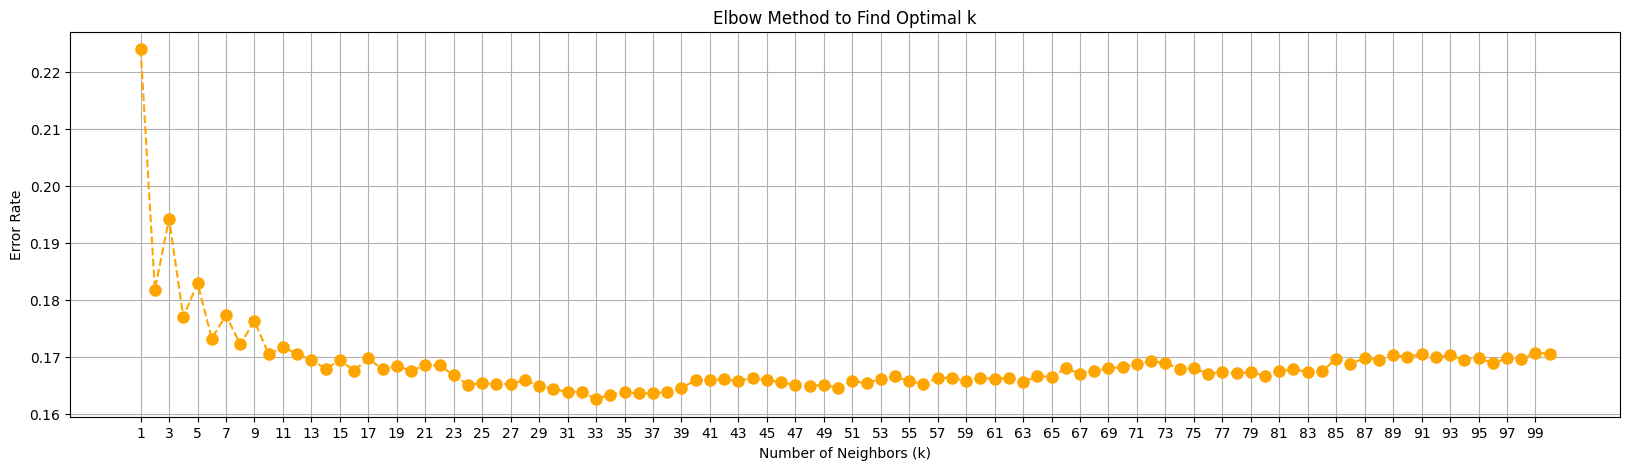

In [ ]:
# test different values of k to perform KNN
error_rates = []
k_values = range(1, 101)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)  # train the model
    y_knn_pred = knn.predict(X_test_scaled)  # predict on test set
    error = 1 - accuracy_score(Y_test, y_knn_pred)  # calculate error rate
    error_rates.append(error)

# plot the elbow curve to find the optimal value of k
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='orange', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 101, step=2))
plt.grid(True)
plt.show()

Observation: The error rate significantly decreased when k=33. After that, we don't see any further dip.

Train Accuracy: 0.85
Test Accuracy: 0.84

Confusion Matrix (Train):


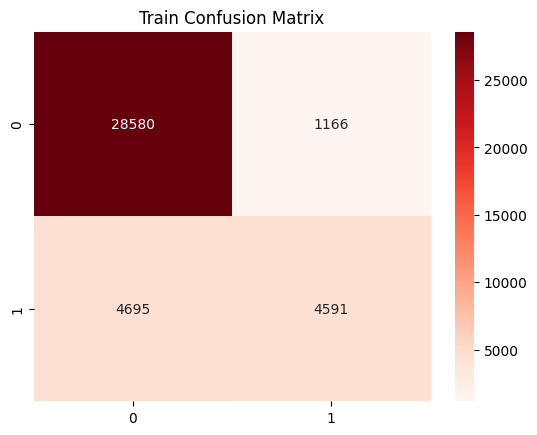


Confusion Matrix (Test):


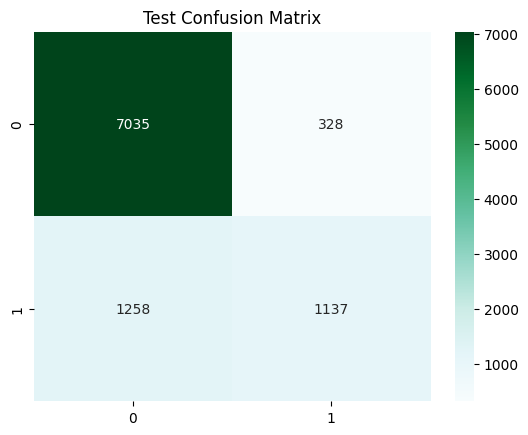


Classification Report (Train):
              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91     29746
        >50K       0.80      0.49      0.61      9286

    accuracy                           0.85     39032
   macro avg       0.83      0.73      0.76     39032
weighted avg       0.84      0.85      0.84     39032


Classification Report (Test):
              precision    recall  f1-score   support

       <=50K       0.85      0.96      0.90      7363
        >50K       0.78      0.47      0.59      2395

    accuracy                           0.84      9758
   macro avg       0.81      0.72      0.74      9758
weighted avg       0.83      0.84      0.82      9758



KNeighborsClassifier(n_neighbors=33)

In [53]:
# calculate test accuracy when k=33
knn_33 = KNeighborsClassifier(n_neighbors=33)
evaluate_model(knn_33, X_train_scaled, Y_train, X_test_scaled, Y_test)

Observation: After finding optimal k, the model is likely at an ideal point, reducing overfitting and improving generalization, which is why the gap has decreased to 1%.

### Decision Tree

Train Accuracy: 1.00
Test Accuracy: 0.77

Confusion Matrix (Train):


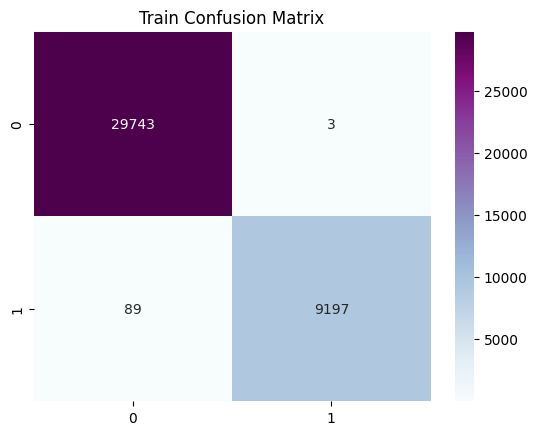


Confusion Matrix (Test):


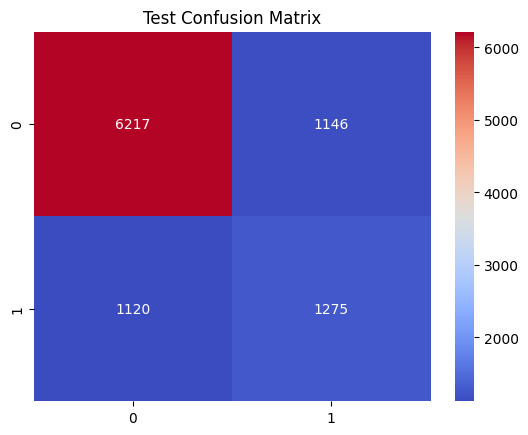


Classification Report (Train):
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     29746
        >50K       1.00      0.99      1.00      9286

    accuracy                           1.00     39032
   macro avg       1.00      1.00      1.00     39032
weighted avg       1.00      1.00      1.00     39032


Classification Report (Test):
              precision    recall  f1-score   support

       <=50K       0.85      0.84      0.85      7363
        >50K       0.53      0.53      0.53      2395

    accuracy                           0.77      9758
   macro avg       0.69      0.69      0.69      9758
weighted avg       0.77      0.77      0.77      9758



DecisionTreeClassifier()

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
evaluate_model(dt, X_train_scaled, Y_train, X_test_scaled, Y_test)

Observation:
- True Negative(TN) = 6222

    Model correctly identifies 6222 people who earn less than 50K income.
- False Positives(FP) = 1141

    Model incorrectly predicts 1141 people who earn less than 50K as earning more.
- False Negatives(FN) = 1127

    Model incorrectly predicts 1127 people who earn more than 50K as earning less.
- True Postive(TP) = 1268

    Model correctly identifies 1268 people who earn more than 50K income.

Observation: Since training accuracy is at 100%, the model is overfitting.

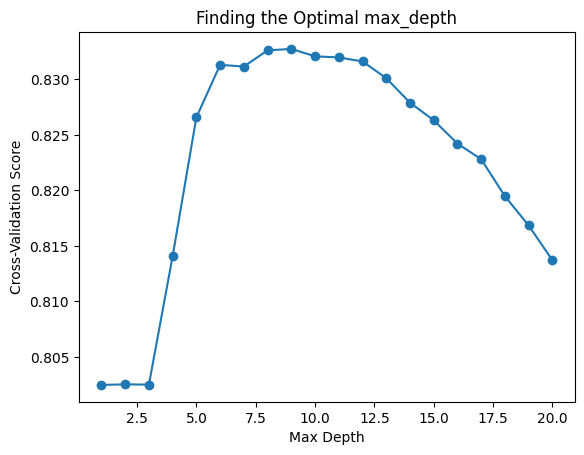

In [55]:
# find the best value for max_depth in decision tree

from sklearn.model_selection import cross_val_score
from statistics import mean

scores = []
depths = range(1, 21)
for d in depths:
    model = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    score = cross_val_score(model, X_train_scaled, Y_train, cv=5).mean()
    scores.append(score)

plt.plot(depths, scores, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Cross-Validation Score")
plt.title("Finding the Optimal max_depth")
plt.show()

In [56]:
best_depth = depths[np.argmax(scores)]
print(f"Best max_depth: {best_depth}")

Best max_depth: 9


Train Accuracy: 0.84
Test Accuracy: 0.82

Confusion Matrix (Train):


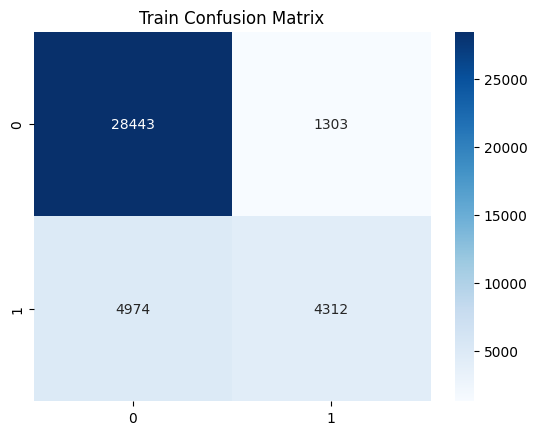


Confusion Matrix (Test):


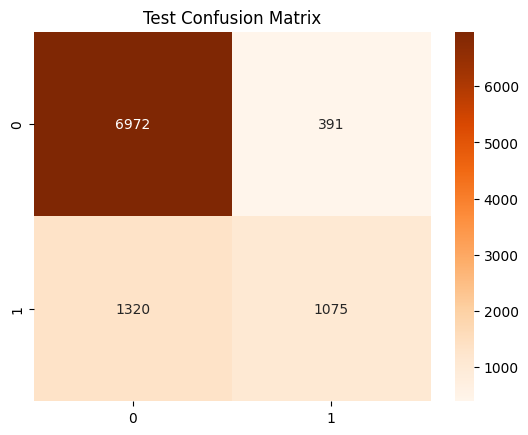


Classification Report (Train):
              precision    recall  f1-score   support

       <=50K       0.85      0.96      0.90     29746
        >50K       0.77      0.46      0.58      9286

    accuracy                           0.84     39032
   macro avg       0.81      0.71      0.74     39032
weighted avg       0.83      0.84      0.82     39032


Classification Report (Test):
              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      7363
        >50K       0.73      0.45      0.56      2395

    accuracy                           0.82      9758
   macro avg       0.79      0.70      0.72      9758
weighted avg       0.81      0.82      0.81      9758



DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [57]:
dt_opt = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
evaluate_model(dt_opt, X_train_scaled, Y_train, X_test_scaled, Y_test)

Observation: The accuracies are well tuned as the gap is only 1%. I can use SMOTE to address class imbalance.

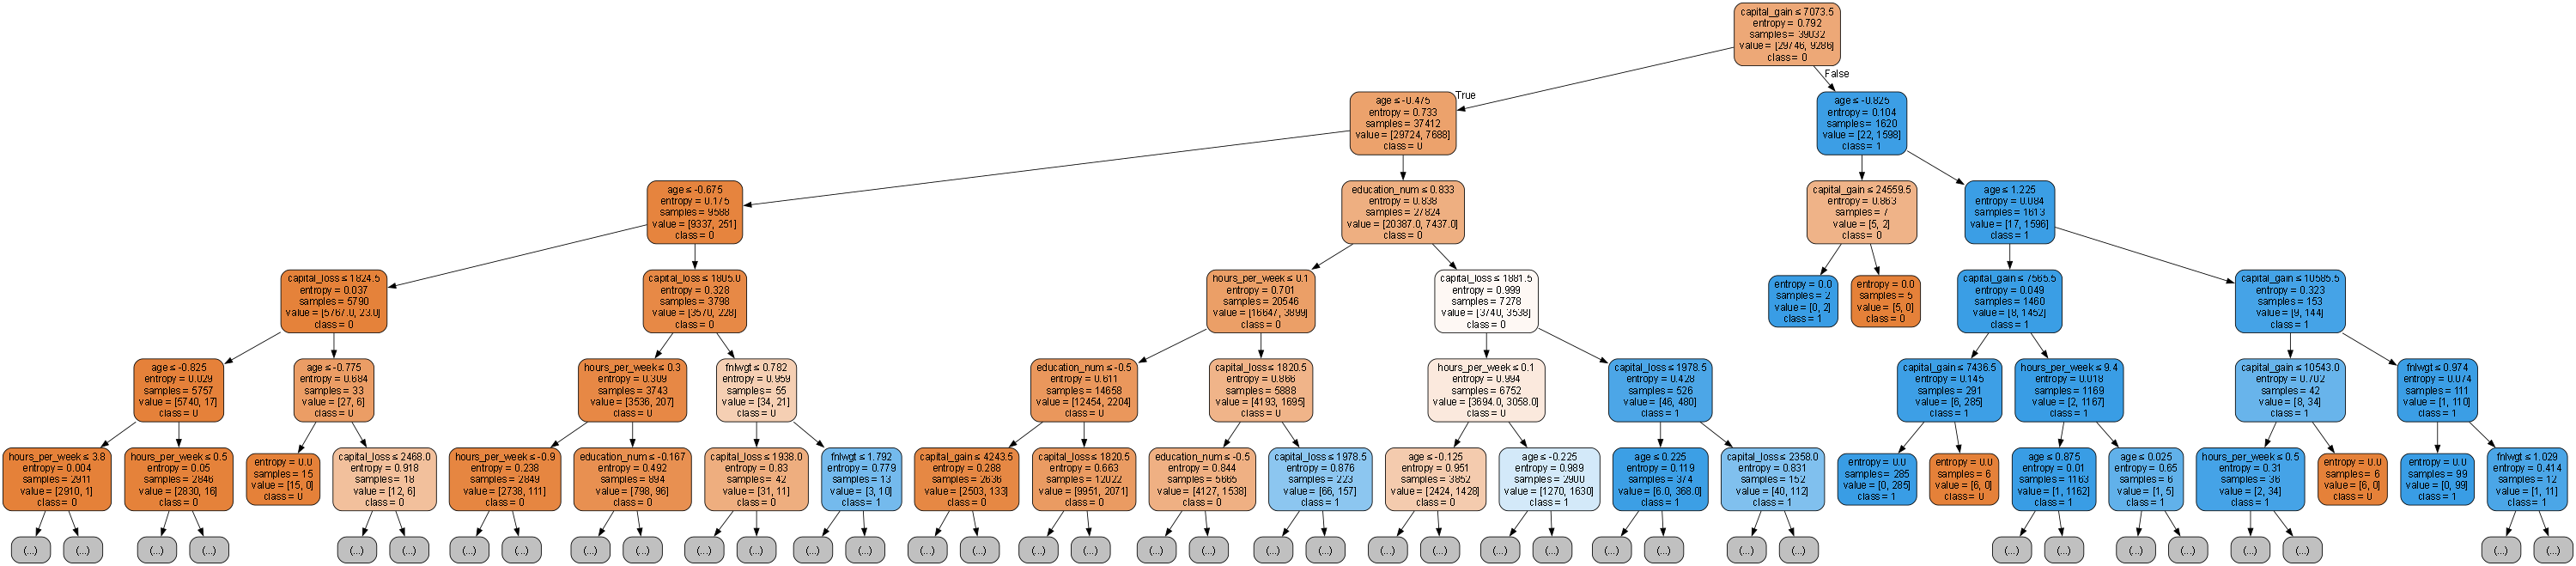

In [58]:
import pydot
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_to_scale)
dot_data = StringIO()
export_graphviz(dt_opt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train_scaled.columns,
                class_names=['0','1'],
                proportion=False,
                max_depth=5)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].set_graph_defaults(size="10,10!", dpi=300)
graph[0].write_png('income.png')
Image('income.png')

### SVM

Evaluating SVM with kernel: poly


c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Train Accuracy: 0.78
Test Accuracy: 0.77

Confusion Matrix (Train):


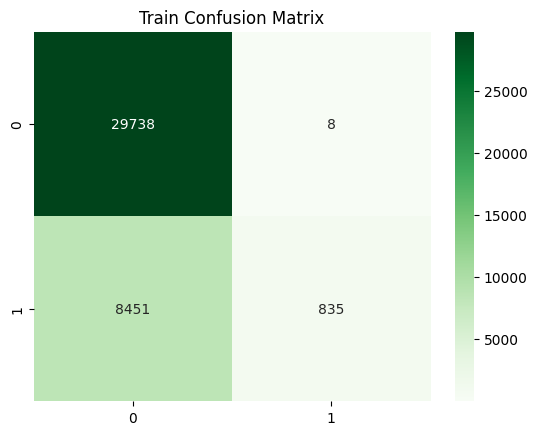


Confusion Matrix (Test):


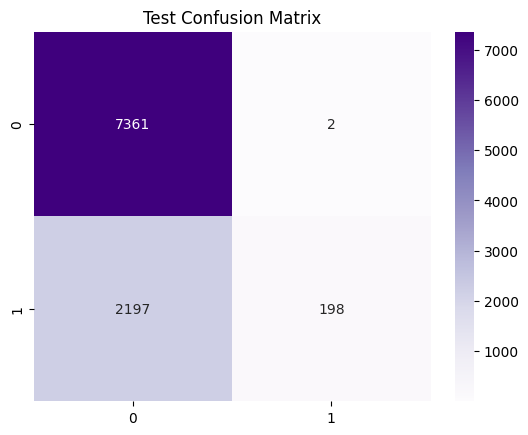


Classification Report (Train):
              precision    recall  f1-score   support

       <=50K       0.78      1.00      0.88     29746
        >50K       0.99      0.09      0.16      9286

    accuracy                           0.78     39032
   macro avg       0.88      0.54      0.52     39032
weighted avg       0.83      0.78      0.71     39032


Classification Report (Test):
              precision    recall  f1-score   support

       <=50K       0.77      1.00      0.87      7363
        >50K       0.99      0.08      0.15      2395

    accuracy                           0.77      9758
   macro avg       0.88      0.54      0.51      9758
weighted avg       0.82      0.77      0.69      9758

Evaluating SVM with kernel: rbf


c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Train Accuracy: 0.80
Test Accuracy: 0.80

Confusion Matrix (Train):


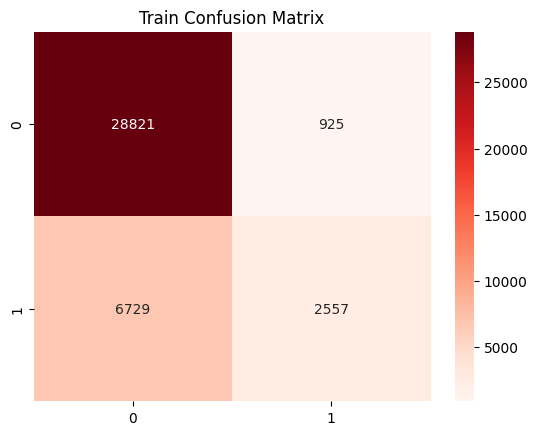


Confusion Matrix (Test):


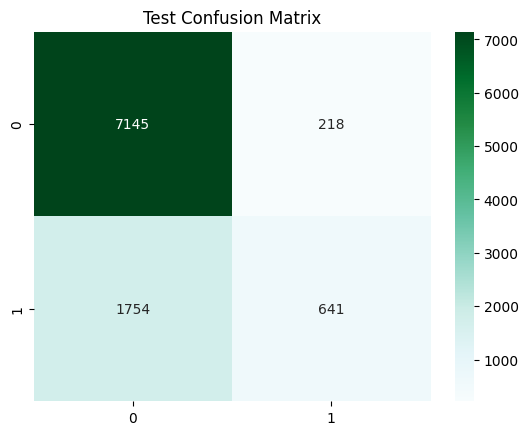


Classification Report (Train):
              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88     29746
        >50K       0.73      0.28      0.40      9286

    accuracy                           0.80     39032
   macro avg       0.77      0.62      0.64     39032
weighted avg       0.79      0.80      0.77     39032


Classification Report (Test):
              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88      7363
        >50K       0.75      0.27      0.39      2395

    accuracy                           0.80      9758
   macro avg       0.77      0.62      0.64      9758
weighted avg       0.79      0.80      0.76      9758



In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernels = ['poly', 'rbf']
models = {}

for kernel in kernels:
    print(f"Evaluating SVM with kernel: {kernel}")
    svm = SVC(kernel=kernel, probability=True, random_state=42)

    models[f"SVM({kernel})"] = evaluate_model(svm, X_train_scaled, Y_train, X_test_scaled, Y_test)

Observation:
- True Negative(TN) = 7145

    Model correctly identifies 7145 people who earn less than 50K income.
- False Positives(FP) = 218

    Model incorrectly predicts 218 people who earn less than 50K as earning more.
- False Negatives(FN) = 1754

    Model incorrectly predicts 1754 people who earn more than 50K as earning less.
- True Postive(TP) = 641

    Model correctly identifies 641 people who earn more than 50K income.

### Random Forest

c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Train Accuracy: 1.00
Test Accuracy: 0.80

Confusion Matrix (Train):


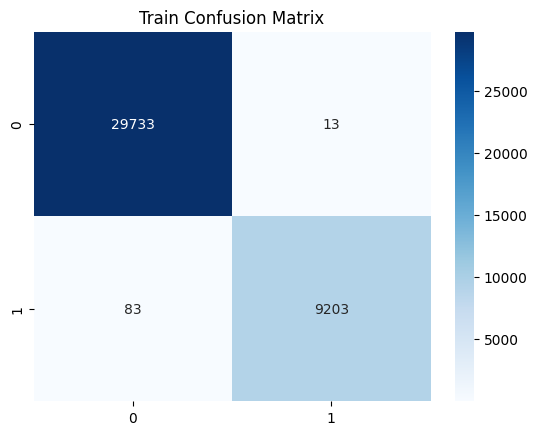


Confusion Matrix (Test):


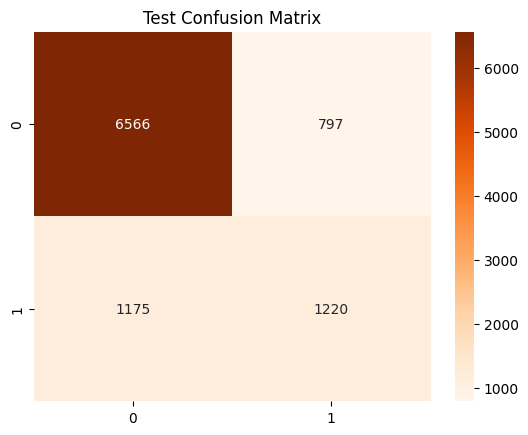


Classification Report (Train):
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     29746
        >50K       1.00      0.99      0.99      9286

    accuracy                           1.00     39032
   macro avg       1.00      1.00      1.00     39032
weighted avg       1.00      1.00      1.00     39032


Classification Report (Test):
              precision    recall  f1-score   support

       <=50K       0.85      0.89      0.87      7363
        >50K       0.60      0.51      0.55      2395

    accuracy                           0.80      9758
   macro avg       0.73      0.70      0.71      9758
weighted avg       0.79      0.80      0.79      9758



RandomForestClassifier()

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
evaluate_model(rf, X_train_scaled, Y_train, X_test_scaled, Y_test)

Observation:
- True Negative(TN) = 6583

    Model correctly identifies 6583 people who earn less than 50K income.
- False Positives(FP) = 780

    Model incorrectly predicts 780 people who earn less than 50K as earning more.
- False Negatives(FN) = 1177

    Model incorrectly predicts 1177 people who earn more than 50K as earning less.
- True Postive(TP) = 1218

    Model correctly identifies 1218 people who earn more than 50K income.

### Feature Importance

          Feature  Gini Importance
1          fnlwgt         0.399287
0             age         0.190701
3    capital_gain         0.136558
2   education_num         0.116180
5  hours_per_week         0.103543
4    capital_loss         0.053731


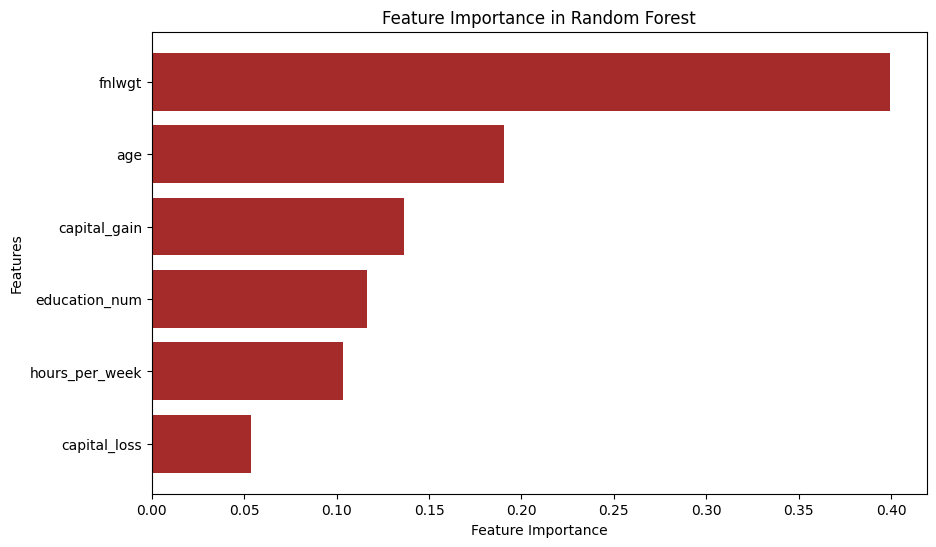

In [63]:
importances = rf.feature_importances_

# Sort the feature importances in the descending order of Gini importance
feature_names = X_train_scaled.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
print(feature_imp_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Gini Importance'], color='brown')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis() # descending order
plt.show()

Observation: fnlwgt is the most imporatant feature (39.9%), suggesting that the weigt assgined to an individual's census data significantly influences the model's predictions. Capital loss has the least impact.

### XGBoost

Train Accuracy: 0.86
Test Accuracy: 0.84

Confusion Matrix (Train):


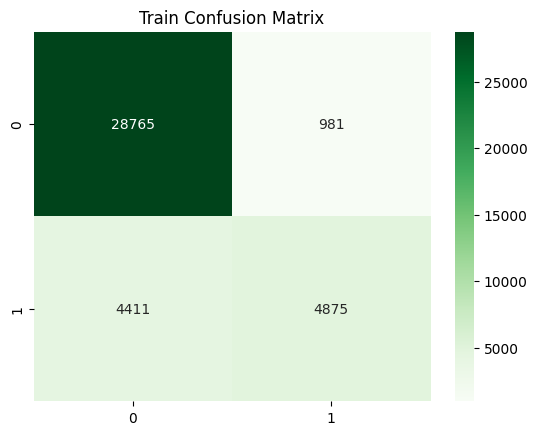


Confusion Matrix (Test):


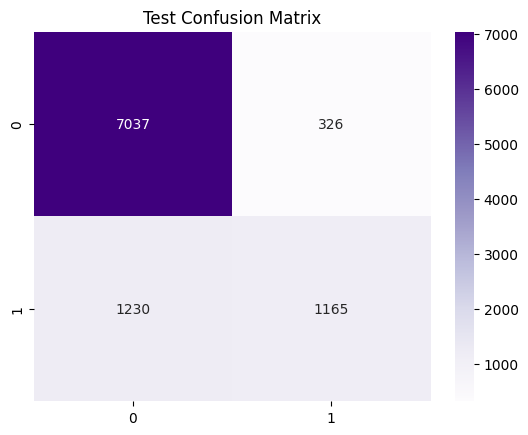


Classification Report (Train):
              precision    recall  f1-score   support

       <=50K       0.87      0.97      0.91     29746
        >50K       0.83      0.52      0.64      9286

    accuracy                           0.86     39032
   macro avg       0.85      0.75      0.78     39032
weighted avg       0.86      0.86      0.85     39032


Classification Report (Test):
              precision    recall  f1-score   support

       <=50K       0.85      0.96      0.90      7363
        >50K       0.78      0.49      0.60      2395

    accuracy                           0.84      9758
   macro avg       0.82      0.72      0.75      9758
weighted avg       0.83      0.84      0.83      9758



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [64]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
evaluate_model(xgb, X_train_scaled, Y_train, X_test_scaled,Y_test)

### ROC-AUC Curve

c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


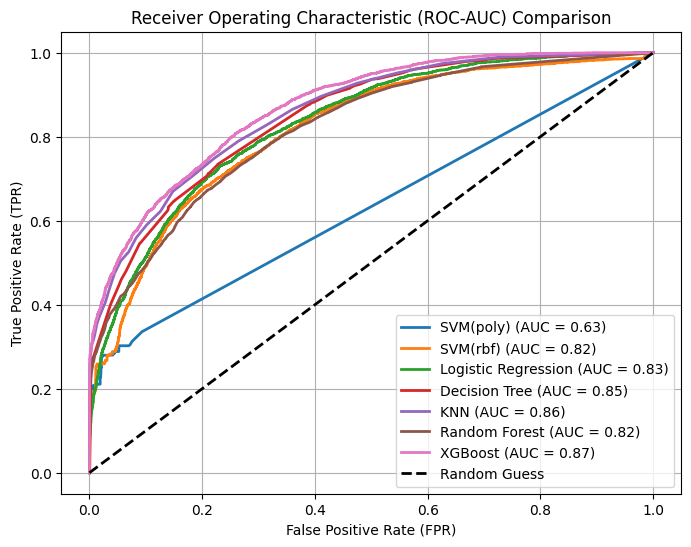

In [65]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_train_scaled, Y_test, label):

    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label = f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8,6))

models.update({
    "Logistic Regression": lr,
    "Decision Tree": dt_opt,
    "KNN": knn_33,
    "Random Forest": rf,
    "XGBoost": xgb,
})

for label, model in models.items():
    plot_roc_curve(model, X_test_scaled, Y_test, label)

# Random guess line
plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC-AUC) Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Observation: XGBoost provides a better balance in predicting individuals whose income is greater than 50K and not earning less than 50K.

### SMOTE

In [66]:
Y_train.value_counts()

income
0    29746
1     9286
Name: count, dtype: int64

In [67]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='minority')
X_resampled, Y_resampled = smote.fit_resample(X_train_scaled, Y_train)

In [68]:
Y_resampled.value_counts()

income
0    29746
1    29746
Name: count, dtype: int64

### Logistic Regression after applying SMOTE

Train Accuracy: 0.74
Test Accuracy: 0.76

Confusion Matrix (Train):


c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


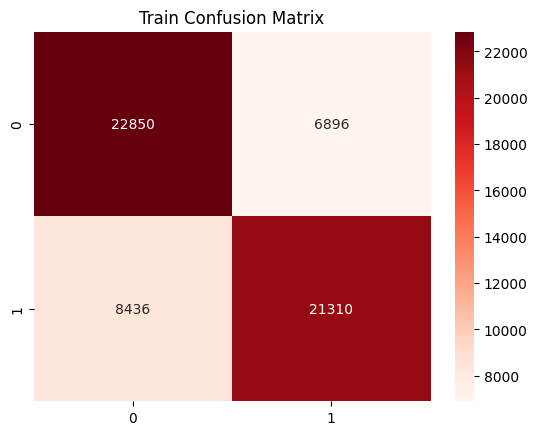


Confusion Matrix (Test):


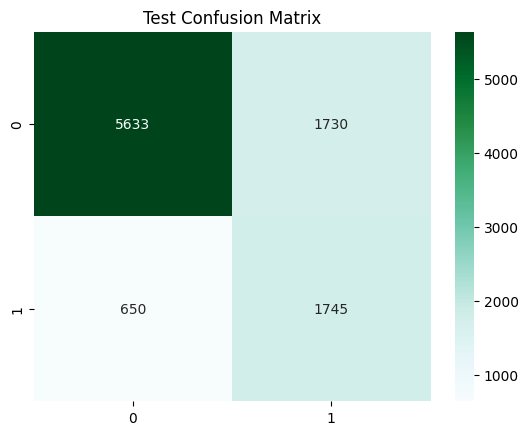


Classification Report (Train):
              precision    recall  f1-score   support

       <=50K       0.73      0.77      0.75     29746
        >50K       0.76      0.72      0.74     29746

    accuracy                           0.74     59492
   macro avg       0.74      0.74      0.74     59492
weighted avg       0.74      0.74      0.74     59492


Classification Report (Test):
              precision    recall  f1-score   support

       <=50K       0.90      0.77      0.83      7363
        >50K       0.50      0.73      0.59      2395

    accuracy                           0.76      9758
   macro avg       0.70      0.75      0.71      9758
weighted avg       0.80      0.76      0.77      9758



LogisticRegression(max_iter=500, random_state=16)

In [69]:
lr_smote = LogisticRegression(random_state=16, max_iter=500)
evaluate_model(lr_smote, X_resampled, Y_resampled, X_test_scaled, Y_test)

Observation: Logistic Regressino performs better before applying SMOTE because it's a simpler, linear model that doesn't need synthetic data to handle class imbalance.

### KNN after applying SMOTE

In [ ]:
error_rate = []
k_values = range(1, 101)
for k in k_values:
    knn_smote = KNeighborsClassifier(n_neighbors=k)
    knn_smote.fit(X_resampled, Y_resampled)
    y_smote = knn_smote.predict(X_test_scaled)  
    error = 1 - accuracy_score(Y_test, y_smote)
    error_rate.append(error)

plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rate, marker='o', linestyle='dashed', color='green', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k (SMOTE)')
plt.xticks(np.arange(1, 101, step=2))
plt.grid(True)
plt.show()

c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\uti

Observation: The error rate significantly decereased when k= . After that, we don't see any further dip.

In [ ]:
knn_ = KNeighborsClassifier(n_neighbors=)
evaluate_model(knn_, X_resampled, Y_resampled, X_test_scaled, Y_test)

c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train Accuracy: 0.81
Test Accuracy: 0.76

Confusion Matrix (Train):


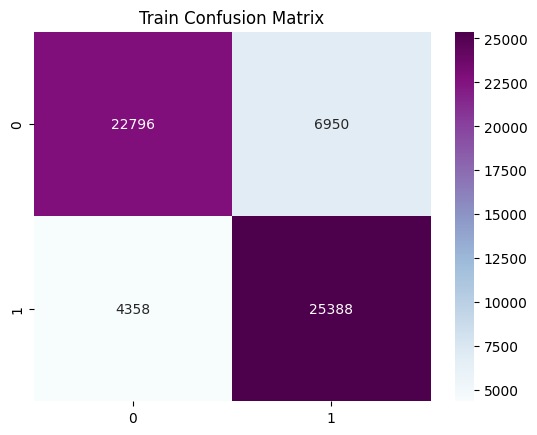


Confusion Matrix (Test):


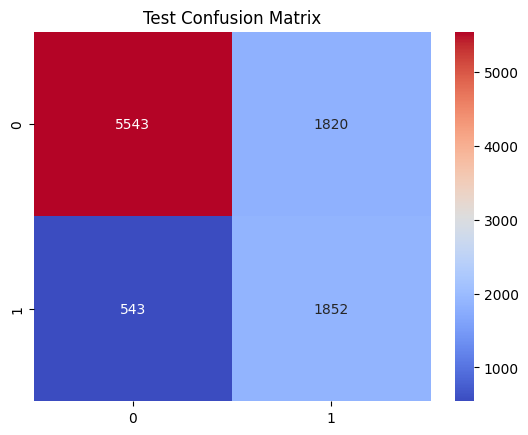


Classification Report (Train):
              precision    recall  f1-score   support

       <=50K       0.84      0.77      0.80     29746
        >50K       0.79      0.85      0.82     29746

    accuracy                           0.81     59492
   macro avg       0.81      0.81      0.81     59492
weighted avg       0.81      0.81      0.81     59492


Classification Report (Test):
              precision    recall  f1-score   support

       <=50K       0.91      0.75      0.82      7363
        >50K       0.50      0.77      0.61      2395

    accuracy                           0.76      9758
   macro avg       0.71      0.76      0.72      9758
weighted avg       0.81      0.76      0.77      9758



KNeighborsClassifier(n_neighbors=33)

Observation: KNN performed better before applying SMOTE. KNN is a distance-based algorithm so SMOTE can degrade its performance if it distorts the original data distribution.

### Decision Tree after applying SMOTE

Train Accuracy: 0.77
Test Accuracy: 0.78

Confusion Matrix (Train):


c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


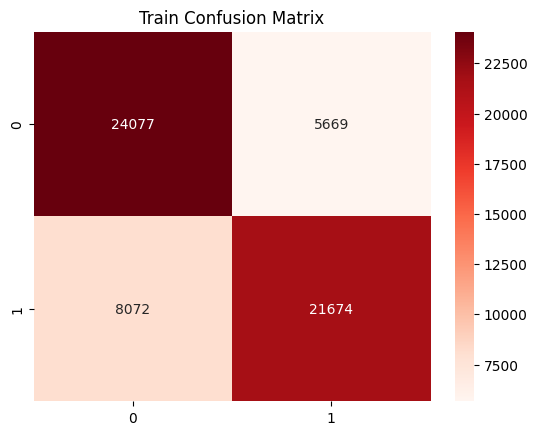


Confusion Matrix (Test):


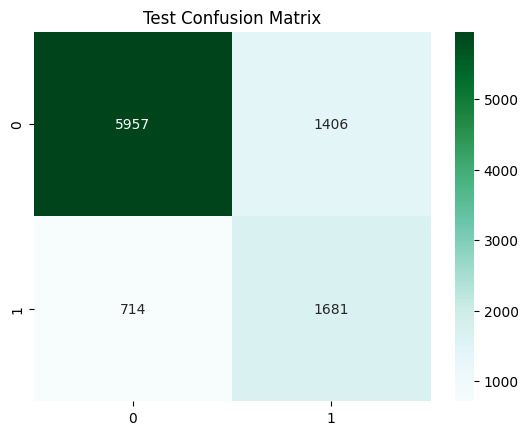


Classification Report (Train):
              precision    recall  f1-score   support

       <=50K       0.75      0.81      0.78     29746
        >50K       0.79      0.73      0.76     29746

    accuracy                           0.77     59492
   macro avg       0.77      0.77      0.77     59492
weighted avg       0.77      0.77      0.77     59492


Classification Report (Test):
              precision    recall  f1-score   support

       <=50K       0.89      0.81      0.85      7363
        >50K       0.54      0.70      0.61      2395

    accuracy                           0.78      9758
   macro avg       0.72      0.76      0.73      9758
weighted avg       0.81      0.78      0.79      9758



DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [ ]:
evaluate_model(dt_opt, X_resampled, Y_resampled, X_test_scaled, Y_test)

Observation: There is a drop in Decision Tree accuracy after applying SMOTE. Decision Trees might overly focus on these unrealistic samples, leading to performance degradation.

### SVM

In [ ]:
svm = SVC(probability=True)
evaluate_model(svm, X_resampled, Y_resampled, X_test_scaled, Y_test)

### Random Forest

In [ ]:
evaluate_model(rf, X_resampled, Y_resampled, X_test_scaled, Y_test)

### GridSearchCV on Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_features': [None, 'sqrt', 'log2'], # Limits the number of features to consider when splitting a node. This helps control overfitting.
    'max_depth': [5, 10, 15],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf
}

rs = RandomizedSearchCV(
    estimator=rf,
    param_grid=param_grid, 
    verbose=1,
    n_jobs=-1,
    cv=5, 
    scoring='accuracy')

grid.fit(X_resampled, Y_resampled)
print("Best Parameters:", rs.best_params_)

best_model = rs.best_estimator
evaluate_model(best_model, X_resampled, Y_resampled, X_test_scaled, Y_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 

Observation: The classification report before and after GridSearchCV is the same. Probably, the model has been built with the best parameters.

### XGBoost after applying SMOTE

In [ ]:
evaluate_model(xgb, X_resampled, Y_resampled, X_test_scaled, Y_test)

### ROC-AUC Curve (SMOTE)

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_resampled, Y_test, label):

    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label = f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8,6))

models.update({
    "Logistic Regression": lr,
    "Decision Tree": dt_opt,
    "KNN": knn_33,
    "Random Forest": rf,
    "XGBoost": xgb,
})

for label, model in models.items():
    plot_roc_curve(model, X_test_scaled, Y_test, label)

# Random guess line
plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC-AUC) Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()